In [8]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [9]:
import pandas as pd
import io
d = pd.read_csv(io.BytesIO(uploaded['data.csv']))
d

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [10]:
#get rid of id and Unnamed
d = d.drop(['id', 'Unnamed: 32'], axis=1)
# replace M malignant to 0 (bad), B benign to 1(good)
d.loc[d['diagnosis'] == 'M', 'diagnosis'] = 0.0
d.loc[d['diagnosis'] == 'B', 'diagnosis'] = 1.0
d['diagnosis'] = d['diagnosis'].astype('float64')

In [11]:
# make sure there is no empty columns
d.isna().sum().sum()

np.int64(0)

In [12]:
# medians mean
d.median()

,0
diagnosis,1.000000
radius_mean,13.370000
texture_mean,18.840000
perimeter_mean,86.240000
area_mean,551.100000
smoothness_mean,0.095870
compactness_mean,0.092630
concavity_mean,0.061540
concave points_mean,0.033500
symmetry_mean,0.179200


In [13]:
d.mean()

,0
diagnosis,0.627417
radius_mean,14.127292
texture_mean,19.289649
perimeter_mean,91.969033
area_mean,654.889104
smoothness_mean,0.096360
compactness_mean,0.104341
concavity_mean,0.088799
concave points_mean,0.048919
symmetry_mean,0.181162


In [14]:
# get min, max, dispersion
dmin = d.min(numeric_only=True)
dmax = d.max(numeric_only=True)
d.std(numeric_only=True)

,0
diagnosis,0.483918
radius_mean,3.524049
texture_mean,4.301036
perimeter_mean,24.298981
area_mean,351.914129
smoothness_mean,0.014064
compactness_mean,0.052813
concavity_mean,0.079720
concave points_mean,0.038803
symmetry_mean,0.027414


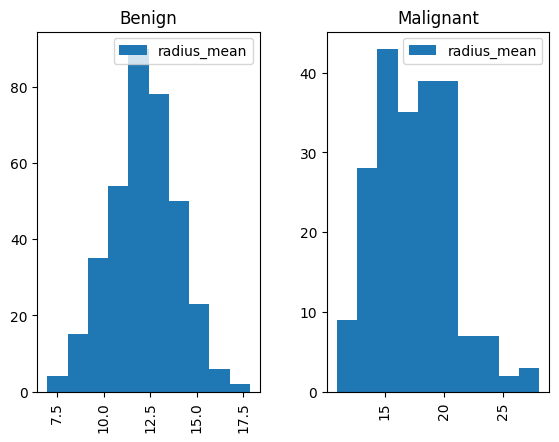

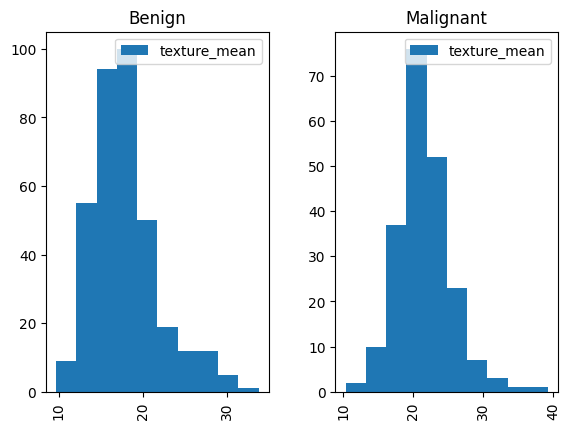

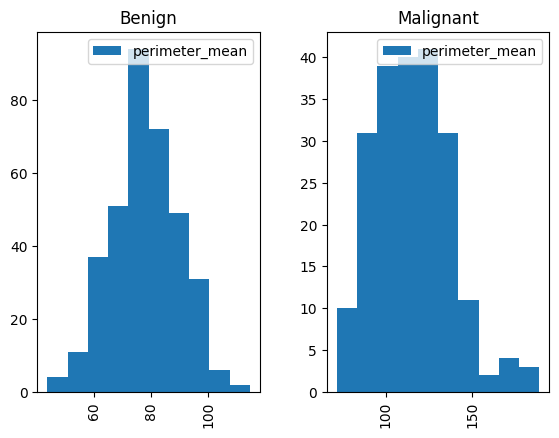

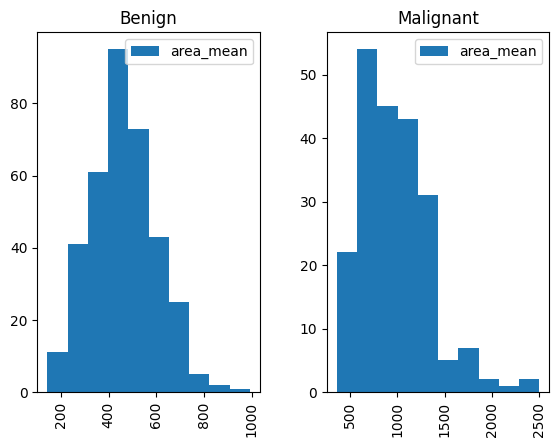

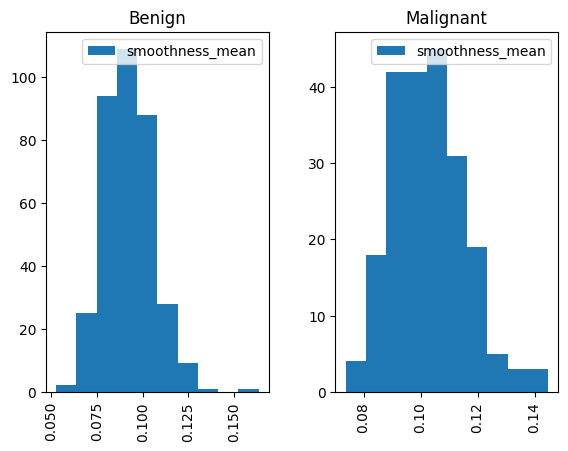

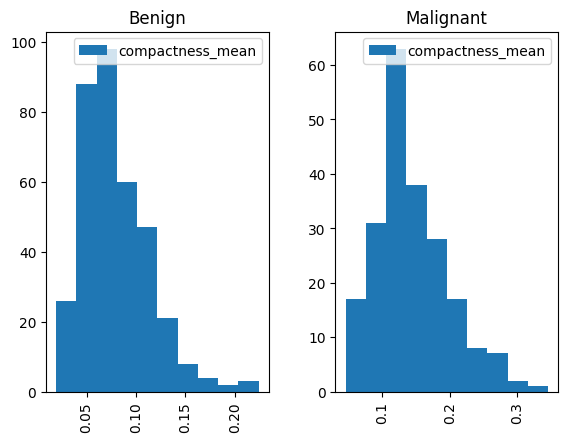

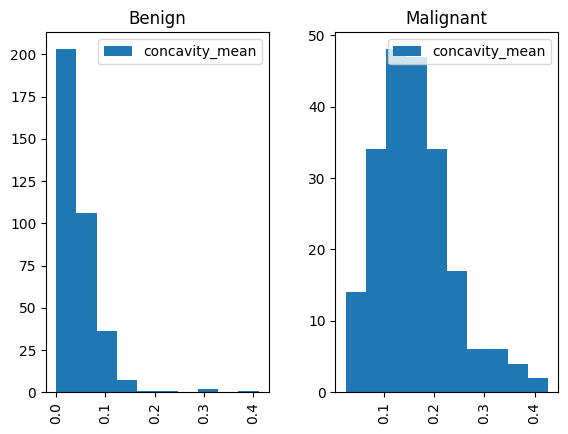

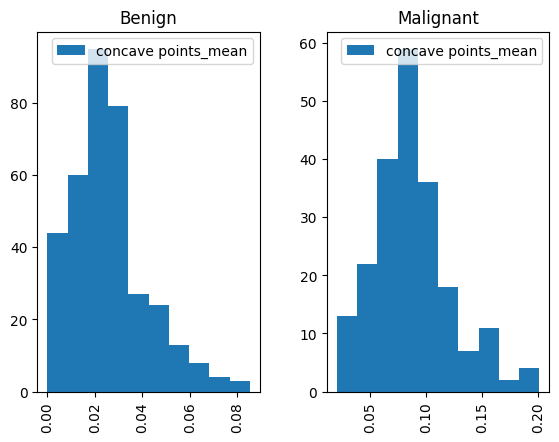

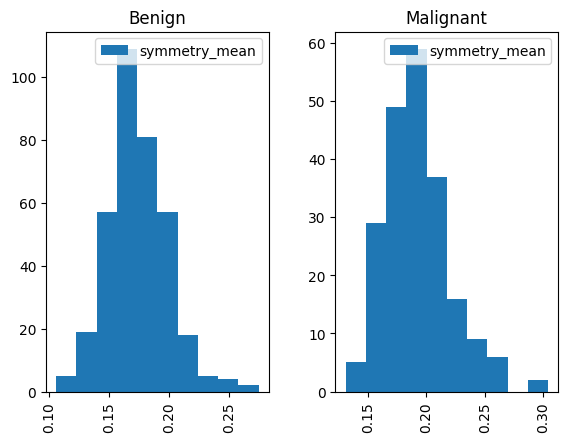

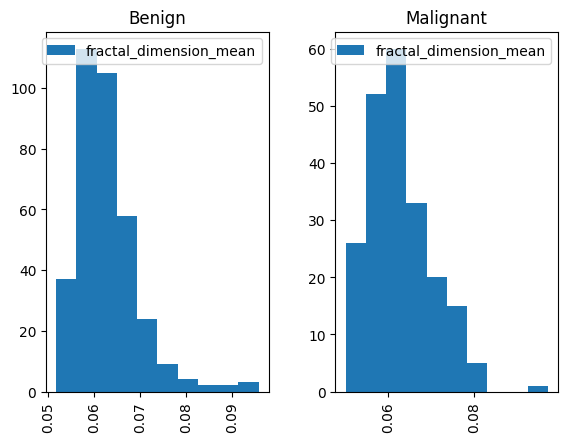

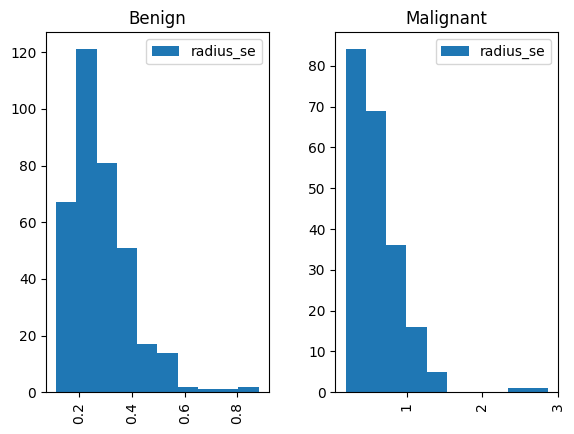

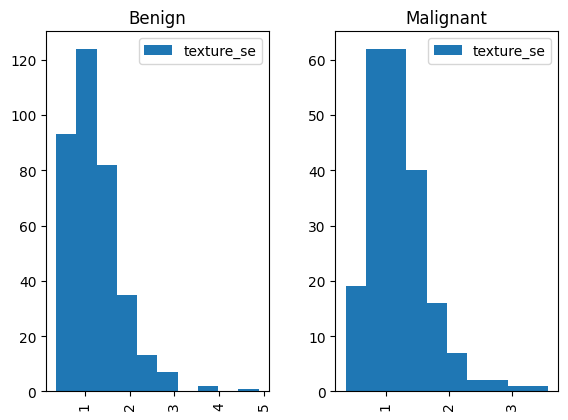

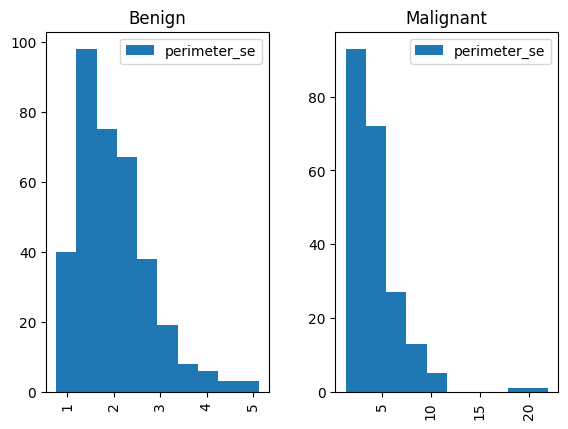

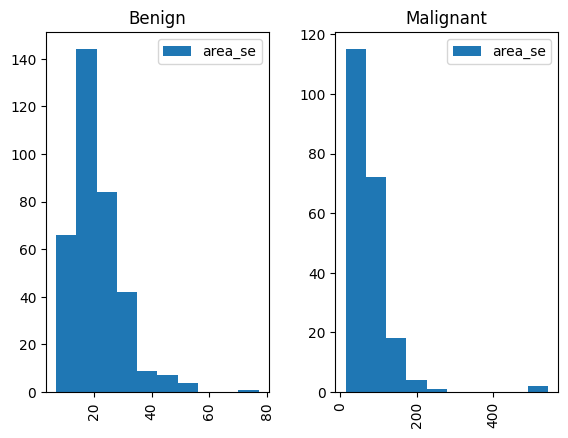

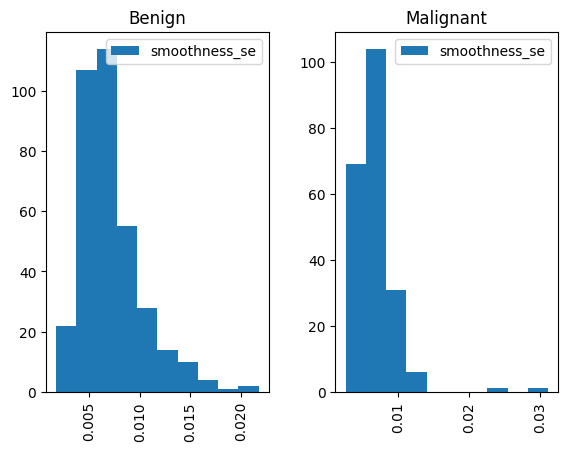

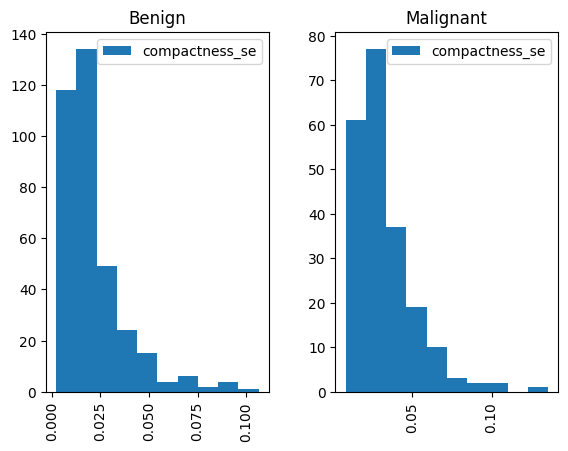

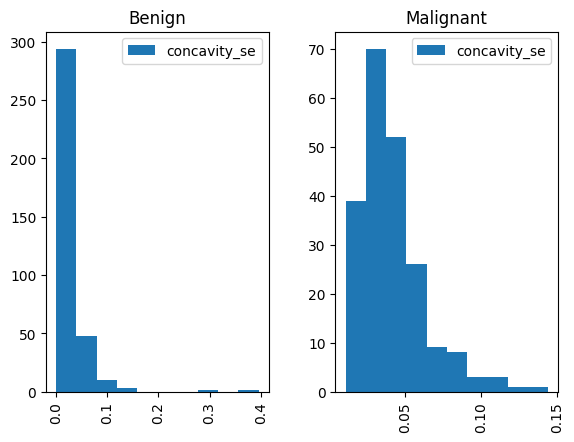

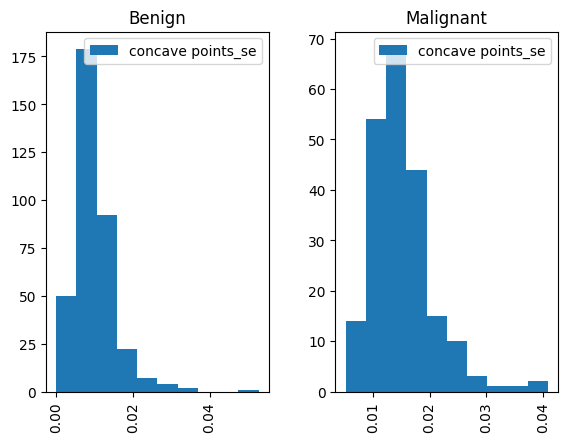

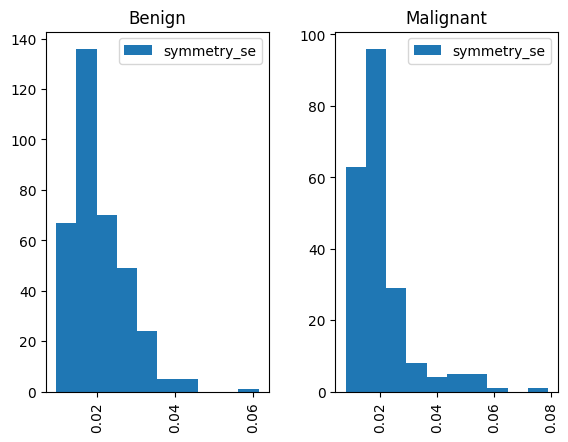

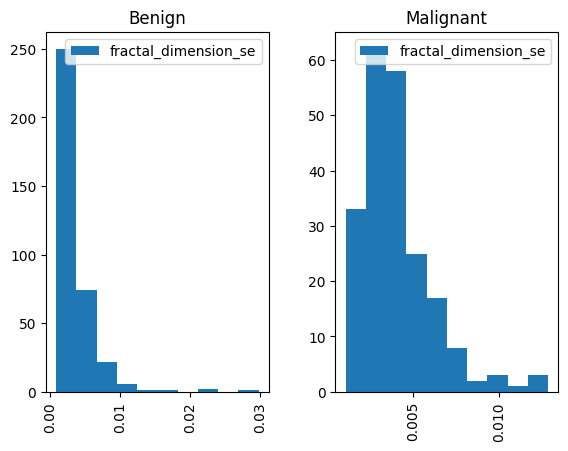

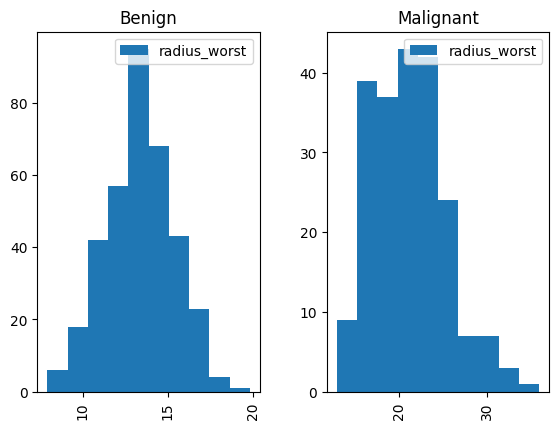

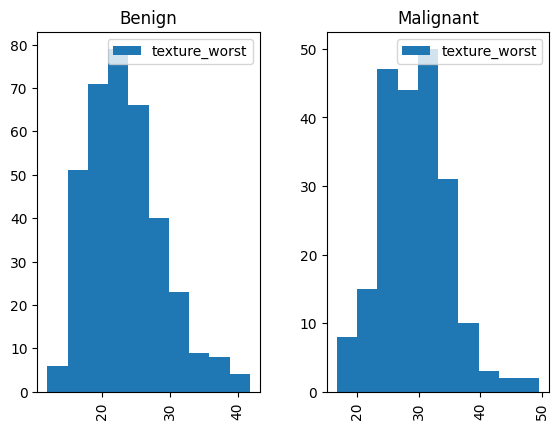

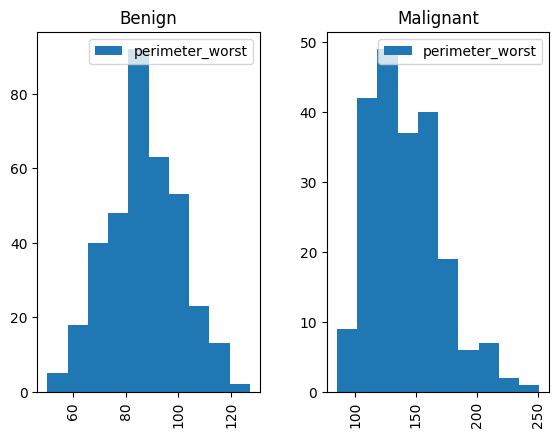

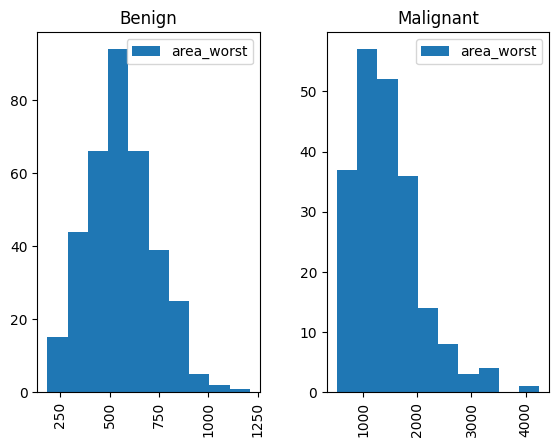

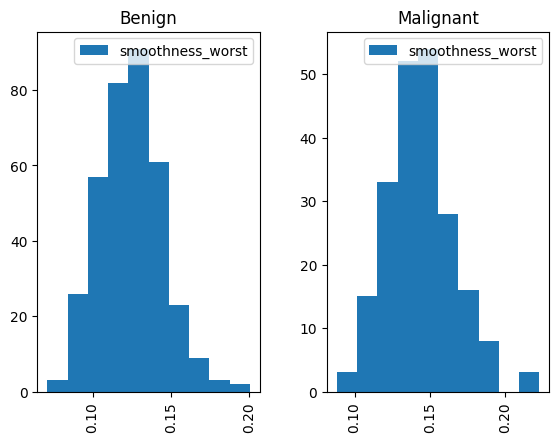

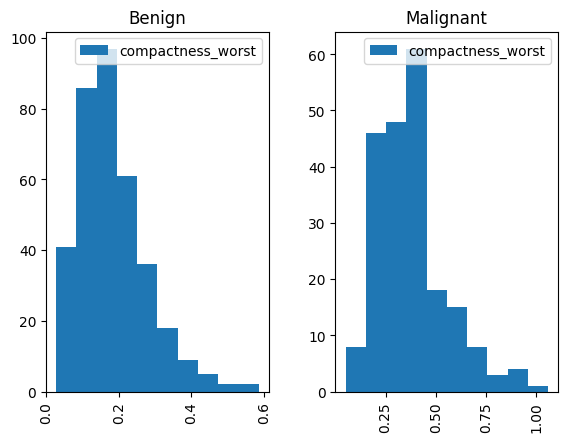

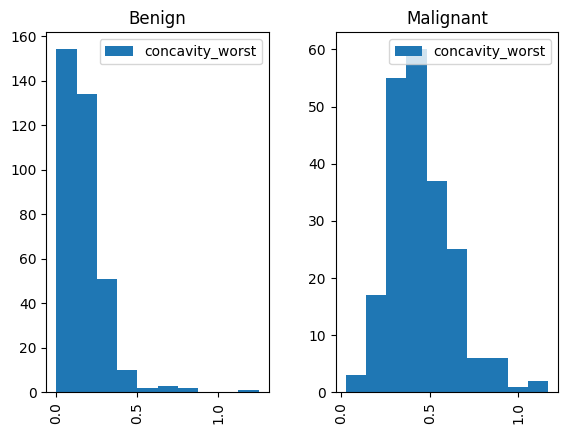

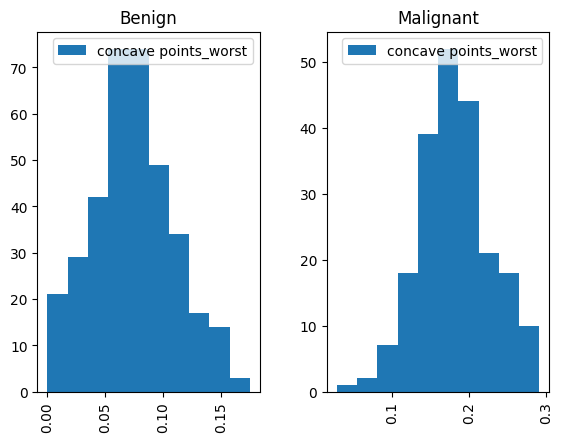

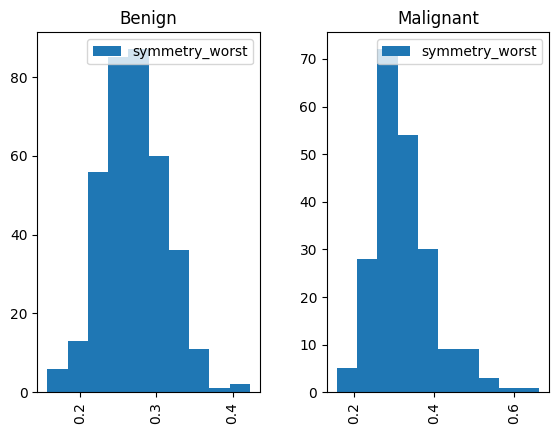

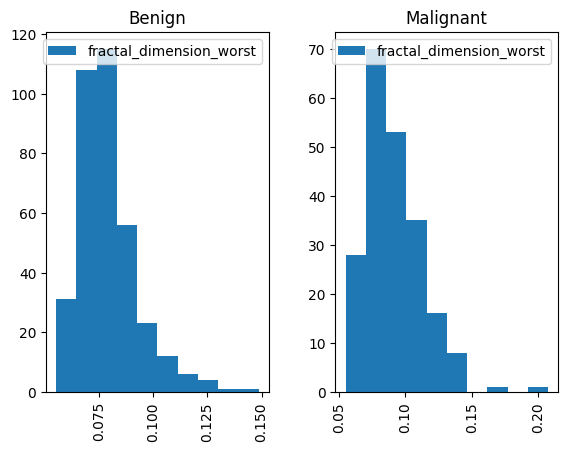

In [15]:
# Постройте гистограммы/распределения признаков, при этом используйте целевую
# переменную, чтобы сгруппировать и раскрасить гистограммы.
# meaningful header:
d.loc[d['diagnosis'] == 0.0, 'diagnosis'] = 'Malignant'
d.loc[d['diagnosis'] == 1.0, 'diagnosis'] = 'Benign'

columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for c in columns:
    d.hist(column=c, by='diagnosis', legend = True)

d.loc[d['diagnosis'] == 'Malignant', 'diagnosis'] = 0.0
d.loc[d['diagnosis'] == 'Benign', 'diagnosis'] = 1.0
d['diagnosis'] = d['diagnosis'].astype('float64')

In [16]:
# Постройте heatmap для матрицы корреляций,
# есть ли признаки, которые сильно скоррелированы? Какие это признаки?
d.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


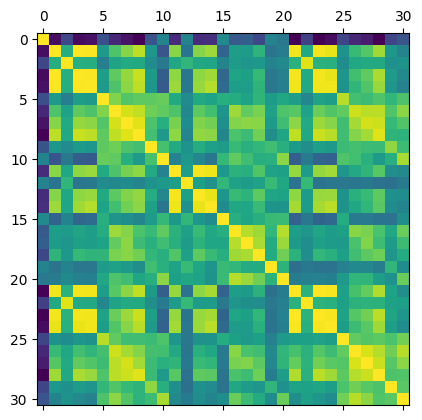

In [18]:
# сильно коррелируют radius_mean perimeter_mean area_mean radus_worst
# perimeter_worst area_worst это и понятно, это просто геометрические размеры

# Коррелируют между собой практически все *_mean - *_worst
# например texture_mean texture_worst - это объяснимо они описывают одно и то же.
# помимо всего прочего видно что самые высокие коефф. корреляции с  целевой
# функцией имеют признаки  concave_points_mean ( -0.776614 ) обратная
# зависимость. т.е. чем меньше concave_points_mean тем более вероятно
# что benign. На гистограмме видно что если concave_points_mean больше 0.09,
# то скорее всего malignant.  Нет ни одной benign с concave_points_mean > 0.09
# и очень много malignant c concave_points_mean > 0.09
# Еще более информативна concave points_worst	-0.793566

import matplotlib.pyplot as plt
plt.matshow(d.corr())
plt.show()
# картинка бесполезна. попробуй угадай что такое feature 23
# (вроде 23? а! нет, это 22)  и он коррелирует с  feature номер 3
# (3? а! нет, это 2). Так... а что это?

array([[<Axes: xlabel='perimeter_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='radius_mean', ylabel='perimeter_mean'>],
       [<Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='radius_mean', ylabel='radius_mean'>]], dtype=object)

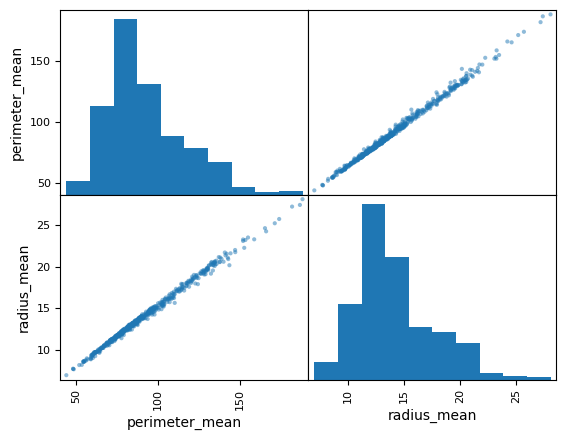

In [19]:
# Постройте для сильно скоррелированных признаков попарные scatterplot-ы,
# действительно ли наблюдается линейная зависимость?
# видно что для "размерных" признаков зависимость очень линейна.
pd.plotting.scatter_matrix(d[['perimeter_mean', 'radius_mean']])

array([[<Axes: xlabel='concave points_worst', ylabel='concave points_worst'>,
        <Axes: xlabel='diagnosis', ylabel='concave points_worst'>],
       [<Axes: xlabel='concave points_worst', ylabel='diagnosis'>,
        <Axes: xlabel='diagnosis', ylabel='diagnosis'>]], dtype=object)

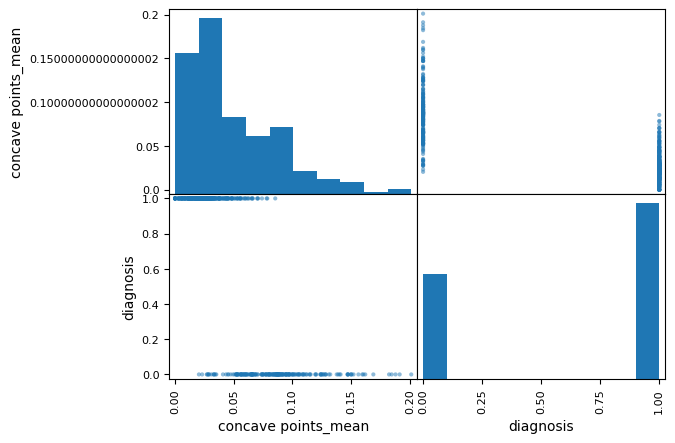

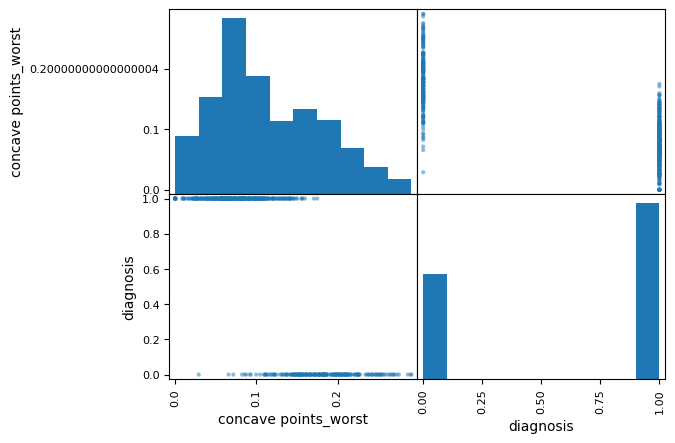

In [20]:
# но мне больше интересна зависимость 'concave points_mean' и
# 'concave points_worst' от diagnosis
pd.plotting.scatter_matrix(d[['concave points_mean', 'diagnosis']])
pd.plotting.scatter_matrix(d[['concave points_worst', 'diagnosis']])
# тут хорошо видно что если признак concave points_mean' большой (больше 0.09),
# то это malignant и если признак concave points_worst' большой (больше 0.2) ,
# то это malignant. Это закономерно так как признаки ( mean, worst ) линейно
# зависимы.

<Axes: title={'center': 'area_se'}, xlabel='diagnosis'>

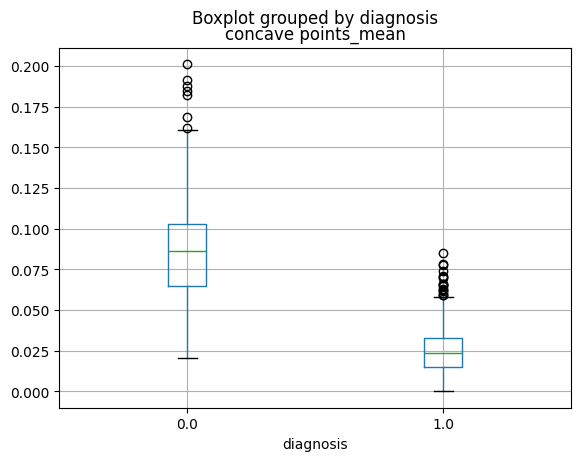

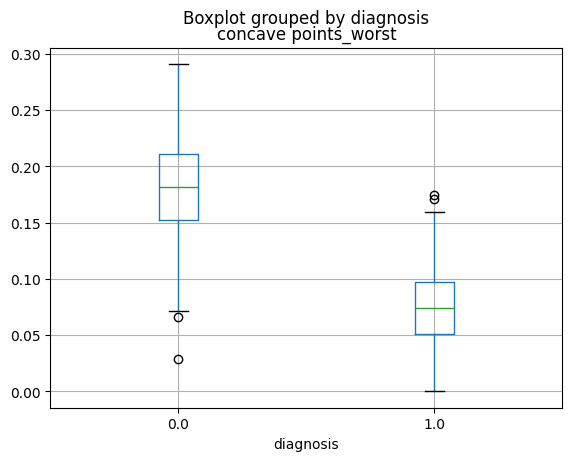

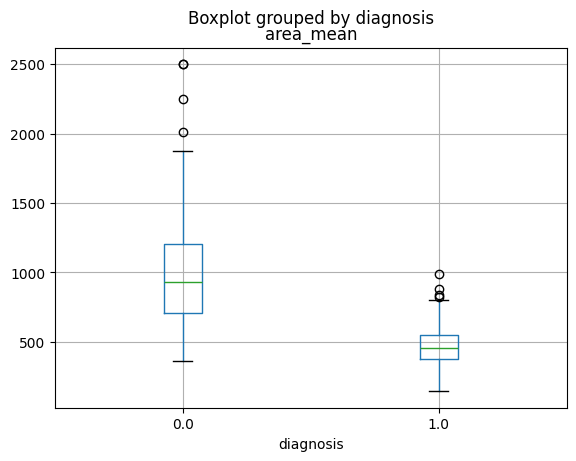

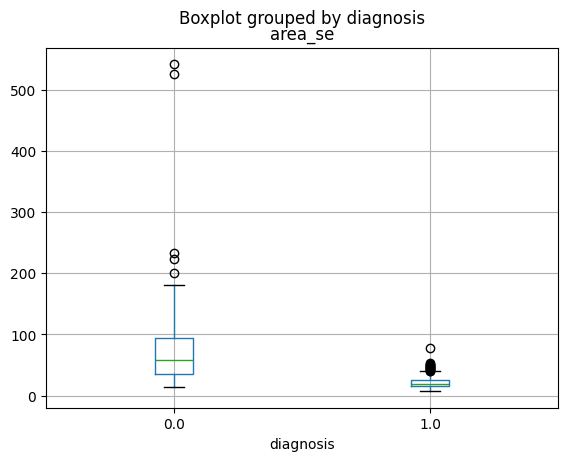

In [21]:
# Используя boxplots и группировку по целевой переменной, попробуйте предположить,
# по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.
# Посмотрим какие еще признаки кроме 'concave points_mean' наиболее информативны
d.boxplot(column=['concave points_mean'], by='diagnosis')
d.boxplot(column=['concave points_worst'], by='diagnosis')
d.boxplot(column=['area_mean'], by='diagnosis')
d.boxplot(column=['area_se'], by='diagnosis')

In [22]:
# Разбейте данные на train-test, отложив 30% выборки для тестирования.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, d.diagnosis, test_size=0.30)

In [23]:
# Приведите все непрерывные переменные к одному масштабу при помощи стандартизации.
# Кратко поясните, почему стандартизация здесь нужна.
# Нужна чтобы признаки имели единый масштаб.
# Иначе модель будет нестабильна, какие-то признаки будут влиять на результат заметно сильнее чем другие.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Постройте модель kNN «из коробки» без настройки параметров.
# Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score),
# постройте ROC-кривую и посчитайте площадь под ней.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def cross_validate(neighbors, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    # потренируемся
    knn.fit(X_train, y_train)
    # проверимся
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    return (accuracy, precision, recall, f1)

tup = cross_validate(1, X_train, y_train, X_test, y_test)

print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        tup[0], tup[1], tup[2], tup[3]))
# уже неплохо

Accuracy:  0.982
Precision: 0.990
Recall:    0.980
F1-score:  0.985


In [25]:
# Теперь проведите настройку параметра числа соседей на кросс-валидации.
# Снова оцените результаты, стало ли лучше? :)
for neighbours in range(1, 10):
    # shuffle
    X_train, X_test, y_train, y_test = train_test_split(d, d.diagnosis,
                                                        test_size=0.30)
    # is it getting better?
    tup = cross_validate(neighbours, X_train, y_train, X_test, y_test)
    print("neighbours = {}\nAccuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}\n".format(
        neighbours, tup[0], tup[1], tup[2], tup[3]))
# несколько раз прогнал от 1 до 10. Результаты нестабильны и нельзя сказать
# что увеличение neighbours заметно улучшает модель.

neighbours = 1
Accuracy:  0.895
Precision: 0.946
Recall:    0.897
F1-score:  0.921

neighbours = 2
Accuracy:  0.930
Precision: 0.913
Recall:    0.969
F1-score:  0.941

neighbours = 3
Accuracy:  0.930
Precision: 0.943
Recall:    0.943
F1-score:  0.943

neighbours = 4
Accuracy:  0.912
Precision: 0.915
Recall:    0.942
F1-score:  0.928

neighbours = 5
Accuracy:  0.895
Precision: 0.957
Recall:    0.895
F1-score:  0.925

neighbours = 6
Accuracy:  0.936
Precision: 0.980
Recall:    0.917
F1-score:  0.947

neighbours = 7
Accuracy:  0.936
Precision: 0.955
Recall:    0.946
F1-score:  0.950

neighbours = 8
Accuracy:  0.918
Precision: 0.950
Recall:    0.914
F1-score:  0.932

neighbours = 9
Accuracy:  0.947
Precision: 0.974
Recall:    0.949
F1-score:  0.961



In [26]:
# все таки интуиция подсказывает что
# самая простая нейронка даст результат близкий к 100%. Пробую.
import tensorflow as tf
import numpy as np
from tensorflow.python.keras import layers
# same 30% for test
X_train, X_test, y_train, y_test = train_test_split(d, d.diagnosis, test_size=0.30)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
# сколько там входов? ага. 31
print(X_train_np.shape)


(398, 31)


In [32]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.Input(shape=(31,)))
tf_model.add(tf.keras.layers.Dense(1))
'''
 [
  layers.Dense(31),
  layers.Dense(1)
])
'''
tf_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam(),
                 metrics=[tf.keras.metrics.Accuracy(),
                          tf.keras.metrics.Precision(),
                          tf.keras.metrics.Recall()])
tf_model.fit(X_train_np, y_train_np, epochs=10)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 23287.0039 - precision_1: 0.6248 - recall_1: 1.0000   
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 13875.1387 - precision_1: 0.6412 - recall_1: 1.0000 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 9419.0850 - precision_1: 0.6709 - recall_1: 1.0000 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 7079.7515 - precision_1: 0.6496 - recall_1: 1.0000  
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3564.4414 - precision_1: 0.6365 - recall_1: 0.9966 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 1736.8077 - precision_1: 0.6197 - recall_1: 0.9203 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 1074.0576 - precision_1: 0.5962 - recall_1: 0.7536 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.